33600
29


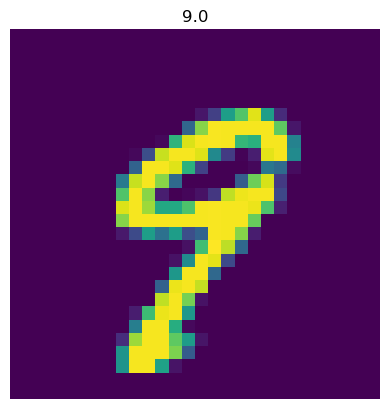

In [1]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Prepare dataset
train = pd.read_csv(r"../lesson1/input/train.csv", dtype=np.float32)
# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
# print(targets_numpy)
# print(train.label)
features_numpy = train.loc[:, train.columns != "label"].values / 255  # normalization
# print(type(features_numpy))
# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(
    features_numpy, targets_numpy, test_size=0.2, random_state=42
)
print(len(features_train))
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(
    torch.LongTensor
)  # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)  # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10001
num_epoches = n_iters / (len(features_train) / batch_size)
num_epoches = int(num_epoches)
print(num_epoches)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
print(train)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)
# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

# visualize one of the images in data set
plt.imshow(features_numpy[11].reshape(28, 28))
plt.axis("off")
plt.title(str(targets_numpy[11]))
# plt.savefig("graph.png")
plt.show()

In [2]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size) -> None:
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


# Instantiate Model Class
input_dim = 28 * 28  # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegression(input_dim, output_dim)
# print(model.input_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [3]:
# Training the model
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epoches):
    for i, (images, labels) in enumerate(train_loader):
        # Define variable
        # print(i, (images, labels))
        # print(len(train_loader))
        train = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)
        # print(train)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        # Calculate the gradients
        loss.backward()
        # Update parameters
        optimizer.step()

        # Prediction
        count += 1
        if count % 50 == 0:
            # Calculate the Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28 * 28))
                # Forward propagation
                outputs = model(test)
                # Get predictions fromthe maximum value
                predicted = torch.max(outputs.data, 1)[1]
                # print(torch.max(outputs.data, 1)[1])
                # Total number of labels
                total += len(labels)

                # Total correct prediction
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print(
                "Iteration: {}  Loss: {}  Accuracy: {}%".format(
                    count, loss.data, accuracy
                )
            )

Iteration: 500  Loss: 1.8160407543182373  Accuracy: 68.92857360839844%
Iteration: 1000  Loss: 1.6112141609191895  Accuracy: 76.58333587646484%
Iteration: 1500  Loss: 1.28609037399292  Accuracy: 79.17857360839844%
Iteration: 2000  Loss: 1.209999680519104  Accuracy: 80.61904907226562%
Iteration: 2500  Loss: 1.046118974685669  Accuracy: 81.51190185546875%
Iteration: 3000  Loss: 0.9247708320617676  Accuracy: 82.33333587646484%
Iteration: 3500  Loss: 0.8955720663070679  Accuracy: 82.76190185546875%
Iteration: 4000  Loss: 0.7537727355957031  Accuracy: 83.17857360839844%
Iteration: 4500  Loss: 0.9737322926521301  Accuracy: 83.55952453613281%
Iteration: 5000  Loss: 0.8020970225334167  Accuracy: 83.94047546386719%
Iteration: 5500  Loss: 0.7476757168769836  Accuracy: 84.25%
Iteration: 6000  Loss: 0.8616042137145996  Accuracy: 84.57142639160156%
Iteration: 6500  Loss: 0.6656147837638855  Accuracy: 84.79762268066406%
Iteration: 7000  Loss: 0.7101388573646545  Accuracy: 84.98809814453125%
Iteration

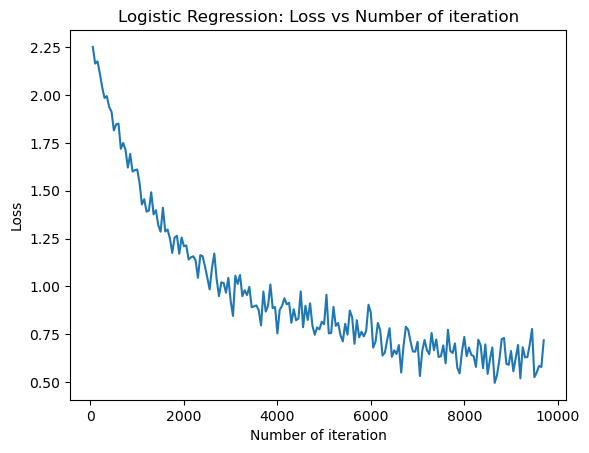

In [4]:
# visualization
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()